# Challenge 1 - T-test

In statistics, t-test is used to test if two data samples have a significant difference between their means. There are two types of t-test:

* **Student's t-test** (a.k.a. independent or uncorrelated t-test). This type of t-test is to compare the samples of **two independent populations** (e.g. test scores of students in two different classes). `scipy` provides the [`ttest_ind`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html) method to conduct student's t-test.

* **Paired t-test** (a.k.a. dependent or correlated t-test). This type of t-test is to compare the samples of **the same population** (e.g. scores of different tests of students in the same class). `scipy` provides the [`ttest_re`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html) method to conduct paired t-test.

Both types of t-tests return a number which is called the **p-value**. If p-value is below 0.05, we can confidently declare the null-hypothesis is rejected and the difference is significant. If p-value is between 0.05 and 0.1, we may also declare the null-hypothesis is rejected but we are not highly confident. If p-value is above 0.1 we do not reject the null-hypothesis.

Read more about the t-test in [this article](http://b.link/test50) and [this Quora](http://b.link/unpaired97). Make sure you understand when to use which type of t-test. 

In [16]:
# Import libraries
import pandas as pd
from scipy.stats import ttest_ind


#### Import dataset

In this challenge we will work on the Pokemon dataset. The goal is to test whether different groups of pokemon (e.g. Legendary vs Normal, Generation 1 vs 2, single-type vs dual-type) have different stats (e.g. HP, Attack, Defense, etc.).

In [2]:
pokemon = pd.read_csv(r'C:\Users\Acer\OneDrive\Desktop\Labs\lab-hypothesis-testing-2\your-code\Pokemon.csv')

In [9]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#### First we want to define a function with which we can test the means of a feature set of two samples. 

In the next cell you'll see the annotations of the Python function that explains what this function does and its arguments and returned value. This type of annotation is called **docstring** which is a convention used among Python developers. The docstring convention allows developers to write consistent tech documentations for their codes so that others can read. It also allows some websites to automatically parse the docstrings and display user-friendly documentations.

Follow the specifications of the docstring and complete the function.

In [ ]:
def t_test_features(s1, s2, features=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']):
    """Test means of a feature set of two samples
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of features to test
    
    Returns:
        dict: a dictionary of t-test scores for each feature where the feature name is the key and the p-value is the value
    """
    results = {}

    # Your code here
    
    return results

#### Using the `t_test_features` function, conduct t-test for Lengendary vs non-Legendary pokemons.

*Hint: your output should look like below:*

```
{'HP': 1.0026911708035284e-13,
 'Attack': 2.520372449236646e-16,
 'Defense': 4.8269984949193316e-11,
 'Sp. Atk': 1.5514614112239812e-21,
 'Sp. Def': 2.2949327864052826e-15,
 'Speed': 1.049016311882451e-18,
 'Total': 9.357954335957446e-47}
 ```

In [5]:
import researchpy as rp

In [7]:
rp.ttest(group1= pokemon['Defense'][pokemon['Attack'] == 'Legendary'], group1_name= "Legendary",
         group2= pokemon['Defense'][pokemon['Attack'] == 'non-Legendary'], group2_name= "non-Legendary")

c:\Users\Acer\anaconda3\envs\ClassJuly7\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
c:\Users\Acer\anaconda3\envs\ClassJuly7\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Acer\anaconda3\envs\ClassJuly7\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\Acer\anaconda3\envs\ClassJuly7\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(        Variable    N  Mean  SD  SE  95% Conf.  Interval
 0      Legendary  0.0   NaN NaN NaN        NaN       NaN
 1  non-Legendary  0.0   NaN NaN NaN        NaN       NaN
 2       combined  0.0   NaN NaN NaN        NaN       NaN,
                           Independent t-test  results
 0  Difference (Legendary - non-Legendary) =       NaN
 1                      Degrees of freedom =      -2.0
 2                                       t =       NaN
 3                   Two side test p value =       NaN
 4                  Difference < 0 p value =       NaN
 5                  Difference > 0 p value =       NaN
 6                               Cohen's d =       NaN
 7                               Hedge's g =       NaN
 8                           Glass's delta =       NaN
 9                             Pearson's r =       NaN)

In [14]:
PokemonL = pokemon.loc[(pokemon['Legendary']==True)]
PokemonNL = pokemon.loc[(pokemon['Legendary']==False)]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [15]:
rp.ttest(PokemonL, PokemonNL)

c:\Users\Acer\anaconda3\envs\ClassJuly7\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
c:\Users\Acer\anaconda3\envs\ClassJuly7\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Acer\anaconda3\envs\ClassJuly7\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [17]:
ttest_ind(PokemonL, PokemonNL)

TypeError: can only concatenate str (not "float") to str

#### From the test results above, what conclusion can you make? Do Legendary and non-Legendary pokemons have significantly different stats on each feature?

In [ ]:
# Your comment here

#### Next, conduct t-test for Generation 1 and Generation 2 pokemons.

In [19]:
from scipy.stats import ttest_ind

gen1 = pokemon.loc[pokemon['Generation']==1]
gen2 = pokemon.loc[pokemon['Generation']==2]

ttest_ind(pokemon[gen1], pokemon[gen2])

ValueError: Boolean array expected for the condition, not object

#### What conclusions can you make?

In [ ]:
# Your comment here

#### Compare pokemons who have single type vs those having two types.

In [28]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [27]:
Type1 = pd.value_counts(pokemon['Type 1'])
Type2 = pd.value_counts(pokemon['Type 2'])



Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [33]:
pokemon.pivot_table(index=['Name'], values=[Type1,Type2]).reset_index()

TypeError: unhashable type: 'Series'

In [30]:
import matplotlib.pyplot as plt

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

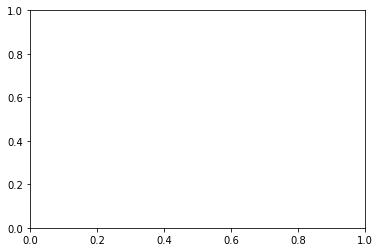

In [32]:
plt.xlabel(Type1) 
plt.ylabel(Type2)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))
df_temp = types_stats.sort_values('Defense',ascending=False)
sb.barplot(x=df_temp.index, y='Defense',
           data=df_temp,
           palette='ocean')

#### What conclusions can you make?

In [ ]:
# Your comment here

#### Now, we want to compare whether there are significant differences of `Attack` vs `Defense`  and  `Sp. Atk` vs `Sp. Def` of all pokemons. Please write your code below.

*Hint: are you comparing different populations or the same population?*

In [38]:
Summary_stat = pokemon.describe()
Summary_stat

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### What conclusions can you make?

In [ ]:
# Your comment here